### Using this notebook to plot a simple cardiac growth model from birth.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from monarch import Hatch
import pathlib

# Initialize model
input_dir = pathlib.Path.cwd() / "input_files"
input_example = input_dir / "human_simple"
beats = Hatch(input_example)

In [3]:
print("Growth type: " + beats.growth.type)
print("Baseline R_mvb: " + str(beats.growth.rmvb[0]))
print("Acute R_mvb: " + str(beats.growth.rmvb[1]))

Growth type: nonmechanic
Baseline R_mvb: 10000000000.0
Acute R_mvb: 10000000000.0


Changing parameters based on height and weight

In [4]:
height = 62 #cm
weight = 6 #kg
# body_surface_area = round(0.007184 * ((height * 100) ** (0.725)) * ((weight) ** (0.425)), 3)
body_surface_area = round(0.007184 * ((height) ** (0.725)) * ((weight) ** (0.425)), 3)
base_resistance = round((body_surface_area / 1.9) ** (-0.75), 3)
# print(base_resistance)
walmsley_resistance_values = {}
walmsley_resistance_values["rvp"] = 0.015
walmsley_resistance_values["rcs"] = 0.09
walmsley_resistance_values["ras"] = 0.9
walmsley_resistance_values["rvs"] = 0.015
walmsley_resistance_values["rcp"] = 0.02
walmsley_resistance_values["rap"] = 0.3
walmsley_resistance_values["rav"] = 0.025
resistance_values = {}
for key, resistance in walmsley_resistance_values.items():
    resistance_values[key] = round(base_resistance * resistance, 4)
print(resistance_values)
walmsley_capacitance_values = {}
walmsley_capacitance_values["cvp"] = 8
walmsley_capacitance_values["cas"] = 1.32
walmsley_capacitance_values["cvs"] = 70
walmsley_capacitance_values["cap"] = 13
# print(walmsley_capacitance_values)
# print(walmsley_resistance_values)
# print(resistance_values)
capacitance_values = {}
for key, capacitance_val in walmsley_capacitance_values.items():
    if key == "cvp":
        walmsley_resistance_val = walmsley_resistance_values["rvp"]
        resistance_val = resistance_values["rvp"]
        capacitance = round(((resistance_val / walmsley_resistance_val) ** (-4 / 3) * capacitance_val), 3)
        capacitance_values[key] = capacitance
    elif key == "cas":
        walmsley_resistance_val = walmsley_resistance_values["ras"]
        resistance_val = resistance_values["ras"]
        capacitance = round(((resistance_val / walmsley_resistance_val) ** (-4 / 3) * capacitance_val), 3)
        capacitance_values[key] = capacitance
    elif key == "cvs":
        walmsley_resistance_val = walmsley_resistance_values["rvs"]
        resistance_val = resistance_values["rvs"]
        capacitance = round(((resistance_val / walmsley_resistance_val) ** (-4 / 3) * capacitance_val), 3)
        capacitance_values[key] = capacitance
    elif key == "cap":
        walmsley_resistance_val = walmsley_resistance_values["rap"]
        resistance_val = resistance_values["rap"]
        capacitance = round(((resistance_val / walmsley_resistance_val) ** (-4 / 3) * capacitance_val), 3)
        capacitance_values[key] = capacitance
    else:
        continue
resistance_values["rmvb"] = 1e20
resistance_values["rtvb"] = 1e20

print("rvp is ", resistance_values["rvp"])
print(capacitance_values)

{'rvp': 0.0589, 'rcs': 0.3532, 'ras': 3.5316, 'rvs': 0.0589, 'rcp': 0.0785, 'rap': 1.1772, 'rav': 0.0981}
rvp is  0.0589
{'cvp': 1.291, 'cas': 0.213, 'cvs': 11.3, 'cap': 2.1}


In [5]:
import monarch.metamophoses as meta

[0.   0.01 0.02]
this is fg dot [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
this is age  2
this is sbv 239.23634562058953
this is volume  [58200. 36368. 41896.  5752.  2552.]
this is heart am [ 7920. 10800.  4160.  5520.  4000.]
this is hr:  126.00511990936967
this is ras and cas  4.173337890077523 0.14484270853546666
this is fg dot [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
this is age  3
this is sbv 253.54582830811196
this is volume  [58200. 36368. 41896.  5752.  2552.]
this is heart am [ 7920. 10800.  4160.  5520.  4000.]
this is hr:  118.33759992447472
this is ras and cas  3.9077953460797548 0.15811228685653334
this is fg dot [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
this is age  4
this is sbv 288.37754387189625
this is volume  [58200. 36368. 41896.  5752.  2552.]
this is heart am [ 7920. 10800.  4160.  5520.  4000.]
this is hr:  111.94799993706226
this is ras and cas  3.4791933370302037 0.18460209184853332
this is fg dot [[1. 1. 1. 1. 1.]
 [1. 1

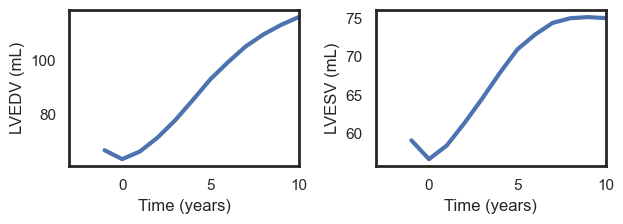

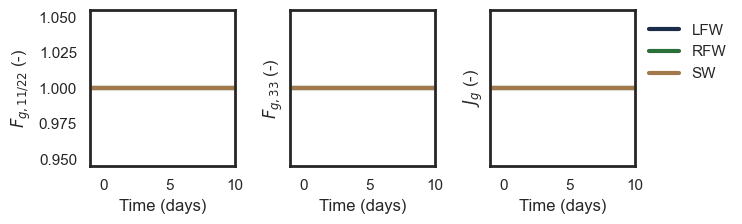

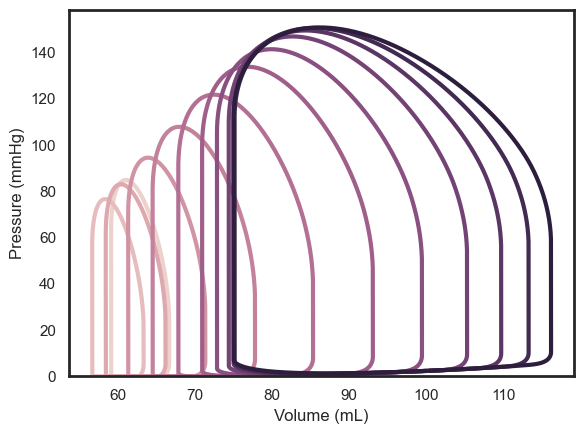

this is fg dot [[1.00217391 1.00217391 1.00217391 1.00217391 1.00217391]
 [1.00217391 1.00217391 1.00217391 1.00217391 1.00217391]
 [1.00217391 1.00217391 1.00217391 1.00217391 1.00217391]]
this is age  2
this is sbv 239.23634562058953
this is volume  [58580.3909571  36605.6985967  42169.82920169  5789.59465267
  2568.67968595]
this is heart am [ 7954.47221172 10847.00756144  4178.10661626  5544.02608696
  4017.41020794]
this is hr:  126.00511990936967
this is ras and cas  4.173337890077523 0.14484270853546666
this is fg dot [[1.00144613 1.00144613 1.00144613 1.00144613 1.00144613]
 [1.00144613 1.00144613 1.00144613 1.00144613 1.00144613]
 [1.00144613 1.00144613 1.00144613 1.00144613 1.00144613]]
this is age  3
this is sbv 253.54582830811196
this is volume  [58834.90352433 36764.73833974 42353.04326556  5814.74854076
  2579.83975591]
this is heart am [ 7977.4952741  10878.4026465   4190.19953791  5560.07246377
  4029.03801722]
this is hr:  118.33759992447472
this is ras and cas  3.9077

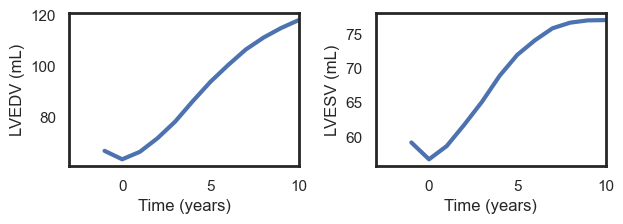

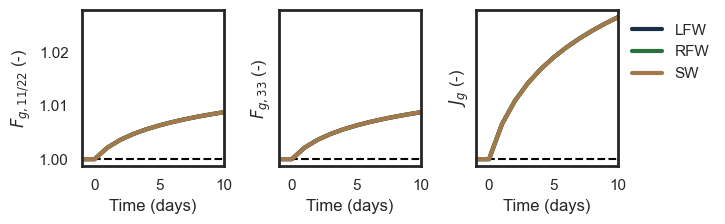

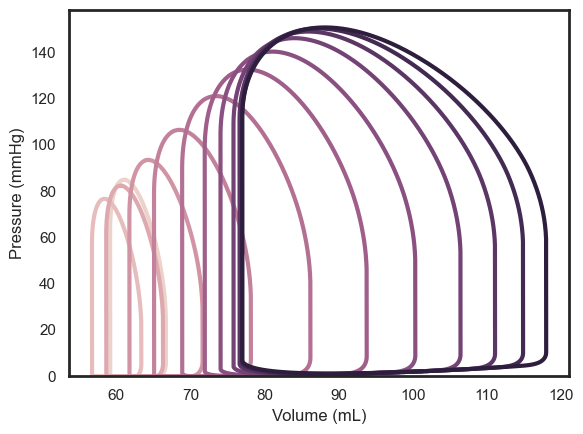

this is fg dot [[1.00434783 1.00434783 1.00434783 1.00434783 1.00434783]
 [1.00434783 1.00434783 1.00434783 1.00434783 1.00434783]
 [1.00434783 1.00434783 1.00434783 1.00434783 1.00434783]]
this is age  2
this is sbv 239.23634562058953
this is volume  [58962.43578532 36844.43066393 42444.84896326  5827.35276009
  2585.43189217]
this is heart am [ 7989.01928166 10894.11720227  4196.25255198  5568.10434783
  4034.85822306]
this is hr:  126.00511990936967
this is ras and cas  4.173337890077523 0.14484270853546666
this is fg dot [[1.002886 1.002886 1.002886 1.002886 1.002886]
 [1.002886 1.002886 1.002886 1.002886 1.002886]
 [1.002886 1.002886 1.002886 1.002886 1.002886]]
this is age  3
this is sbv 253.54582830811196
this is volume  [59474.40777878 37164.35158245 42813.3984244   5877.9517791
  2607.88124831]
this is heart am [ 8035.19848771 10957.08884688  4220.50829658  5600.28985507
  4058.1810544 ]
this is hr:  118.33759992447472
this is ras and cas  3.9077953460797548 0.1581122868565333

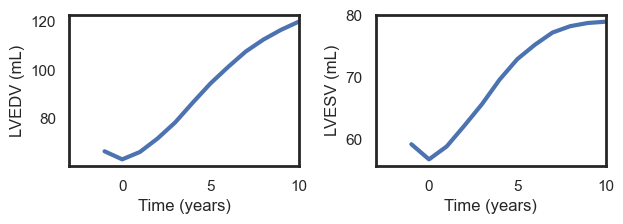

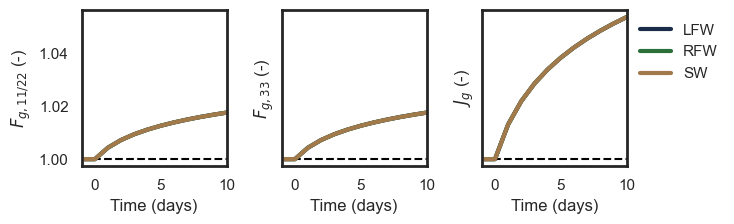

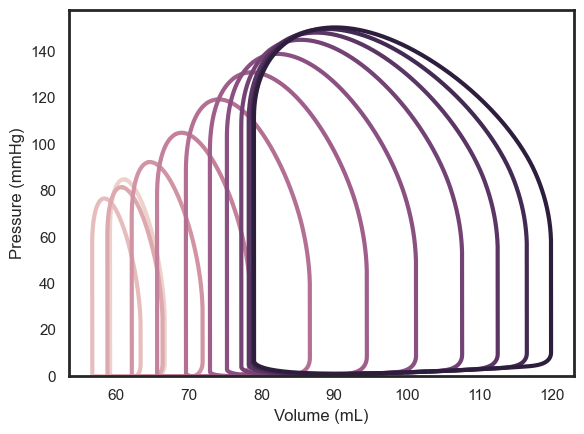

In [6]:
import numpy as np

beats = []
tau_vals = np.arange(0, 3, 1)
tau_vals = tau_vals / 100

print(tau_vals)
for tau in tau_vals:
    beat = Hatch(input_example)
    beat.change_pars({"tau_f+": tau})
    beat.change_pars({"sbv": 140}) #changed sbv under growth as well
    # beat.change_pars({"sbv": np.array([1800, 1800,  1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800])})
    beat.change_pars({"am_ref": np.array([ 7920, 10800, 4160, 5520, 4000])**(1/8)})
    beat.change_pars({"wv": np.array([58200, 36368, 41896, 5752, 2552])**(1/27)})

    beat.change_pars({"rvp": resistance_values['rvp']})
    beat.change_pars({"rcs": resistance_values['rcs']})
    beat.change_pars({"ras": resistance_values['ras']})
    beat.change_pars({"rvs": resistance_values['rvs']})
    beat.change_pars({"rcp": resistance_values['rcp']})
    beat.change_pars({"rap": resistance_values['rap']})
    beat.change_pars({"rav": resistance_values['rav']})

    beat.change_pars({"cvp": capacitance_values['cvp']})
    beat.change_pars({"cas": capacitance_values['cas']})
    beat.change_pars({"cvs": capacitance_values['cvs']})
    beat.change_pars({"cap": capacitance_values['cap']})


    beat.change_pars({"ras": 1})
    beat.change_pars({"cvp": capacitance_values['cvp']*1})
    beat.change_pars({"cas": capacitance_values['cas']*1})
    beat.change_pars({"cvs": capacitance_values['cvs']*1})
    beat.change_pars({"cap": capacitance_values['cap']*1})
    

    beat.just_beat_it()
    beats.append(beat)

    beat.let_it_grow()
    meta.plot_growth(beat, ["LVEDV", "LVESV"], units=["mL", "mL"], time_axis="Time (years)")
    meta.plot_fg(beat)
    meta.pv_loop_growth(beat)

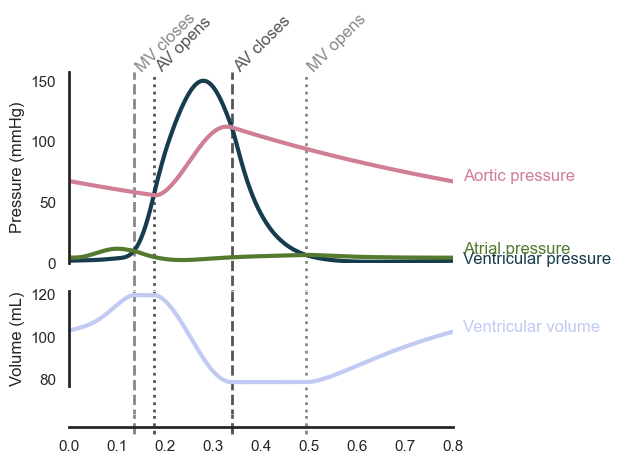

In [7]:
meta.wiggers_diagram(beat)